---
layout: post
title:  "Time series: ARIMA"
date:   2023-05-19 10:14:54 +0700
categories: MachineLearning
---

# TOC

# Time series

A time series is a collection of data points gathered sequentially over a specific time period. The purpose of analyzing this series is to understand past patterns and potentially predict future trends. It is hypothesized that these data points are produced by an underlying process according to a particular statistical distribution. In other words, each data point is a realization of a random variable. This is why a time series can also be referred to as a discrete time stochastic process.

Examples of time series include the stock price or sunspot appearance.

Time series possess certain characteristics that we need to familiarize ourselves with, such as trend, seasonality, and serial dependence. A trend refers to a steady directional shift in the time series data. If there's a logical explanation for this trend, we call it deterministic, if not, it's considered stochastic. Seasonality is a characteristic that reflects the variation in data according to specific times of the year, like temperature fluctuations. Serial correlation, on the other hand, refers to the interdependence between data points, particularly when they are chronologically close.

# Stationarity

Let's define expectation, variance and covariance. The expected value or expectation E(x) of a random variable x is its mean value in the population. We denote $$ E(x) = \mu $$. The variance is a measure of how spread the variable is, it is the expectation of the deviations of the variable from the mean: $$ \sigma^2(x) = E{[x-\mu]}^2 $$. The standard deviation is the square root of the variance of x $$ \sigma(x) $$. The covariance of two random variables x and y tells us how linearly related these two variables are. It is $$ \sigma(x,y) = E{[(x - \mu_x)(y-\mu_y)]} $$. This can be estimated from the sample: $$ Cov(x,y) = \frac{1}{1-n} \sum_{i=1}^n (x_i - \bar{x})(y_i - \bar(y)) $$. Correlation tells us how two variables co-vary $$ \rho(x,y) = \frac{E{[(x-\mu_x)(y-\mu_y)]}}{\sigma_x \sigma_y} = \frac{\sigma(x,y)}{\sigma_x \sigma_y} $$. A correlation of 1 means that the two variables have exact positive linear association. A correlation of 0 indicates no linear association (but it can have nonlinear relationship). A correlation of -1 indicates exact negative linear association. The sample correlation $$ Cor(x,y) = \frac{Cov(x,y)}{sd(x)sd(y)} $$.

For a time series, the definitions of mean, variance are a bit different. The mean of a time series $$ x_t $$ is the expectation $$ E(x_t) = \mu(t) $$. If we remove the deterministic trends or seasonal effects, we can assume that the series is stationary in the mean $$ \mu(t) = \mu $$ that is independent of time. Then $$ \mu $$ can be estimated with the sample mean $$ \bar{x} = \sum_{t=1}^n \frac{x_t}{n} $$. The variance of a time series that is stationary in the mean is $$ \sigma^2(t) = E{[(x_t - \mu)^2]} $$. If we also assume the variance is constant (stationary in variance) $$ \sigma^2(t) = \sigma^2 $$, then we can estimate $$ Var(x) = \frac{\sum(x_t - \bar{x})^2}{n-1} $$

A time series is deemed to be second order stationary if the correlation between consecutive data points relies solely on the lag, which is the number of time intervals separating each pair of consecutive observations. Then the serial covariance (auto covariance) of lag k $$ C_k = E{[(x_t - \mu)(x_{t+k} - \mu)]} $$. The serial correlation (auto correlation) of lag k: $$ \rho_k = \frac{C_k}{\sigma^2} $$. The sample version of autocovariance $$ c_k = \frac{1}{n} \sum_{t=1}^{n-k} (x_t - \bar(x)) (x_{t+k} - \bar{x}) $$. The sample autocorrelation is $$ r_k = \frac{c_k}{c_0} $$.

# White noise

Let's consider two operators: backward shift and difference operators. The backward shift or lag operator B inputs an element and output the previous element: $$ B x_t = x_{t-1} $$. We can apply B n times to step backward n times: $$ B^n x_t = x_{t-n} $$. The difference operator $$ \nabla $$ input an element and return the difference between that and the previous element: $$ \nabla x_t = x_t - x_{t-1} = (1 - B) x_t $$. When we apply n times: $$ \nabla^n = (1 - B)^n $$

A time series model is when the model fits the series so that the remaining series doesn't have auto correlation. The residual error series $$ x_t = y_t - \hat{y_t} $$. (Discrete) white noise is a series that the elements $$ \{w_t: t=1,..n\} $$ are independent and identically distribution (iid) with mean of zero, variance $$ \sigma^2 $$ and no auto correlation. If the elements are from a standard normal distribution, $$ N(0,\sigma^2) $$ then the series is a Gaussian white noise. Here is the properties of a discrete white noise:

$$ \mu_w = E(w_t) = 0 $$

$$ \rho_k = Cor(w_t, w_{t+k}) = \begin{cases}
1 \text{ if } k = 0 \\
0 \text{ if } k \neq 0 \\
\end{cases} $$

 
# Random walk

A random walk is another time series model in which the current element is the previous one plus a random step up or down: $$ x_t = x_{t-1} + w_t $$ with $$ w_t $$ is a discrete white noise series. Applying the backward shift operator: $$ x_t = B x_t + w_t = x_{t-1} + w_t $$. Repeat til the end we got $$ x_t = (1 + B + B^2 + ...) w_t \Rightarrow x_t = w_t + w_{t-1} + w_{t-2} + ... $$. We can see that the random walk the the sum of elements from a discrete white noise series. So $$ \mu_x = 0 $$ and $$ Cov(x_t, x_{t+k}) = t \sigma^2 $$. Which means the covariance is time dependent. In other words, the random walk is non stationary.

# Autoregressive model - AR(p)

Let's define a strictly stationary series, a series that is unchanged for any arbitrary shift in time. A time series model $$ \{x_t\} $$ is strictly stationary if the joint statsitical distribution of the elements $$ x_{t_1}, ... x_{t_n} $$ is the same as that of $$ x_{t_1+m},...x_{t_n+ m}, \forall t_i, m $$.

We would also consider a way to choose among models: Akaike Information Criterion (AIC). If we take the likelihood function for a statistical model with k parameters, and L maximizes the likelihood then $$ AIC = -2log(L) + 2k $$. The best model has the smallest AIC. A closely related indicator is Bayesian Information Criterion (BIC). It also penalizes too many parameters (leading to overfitting). $$ BIC = -2log(L) + klog(n) $$ with n to be the size of the time series set.

Now we dive into the autoregressive model. It is an extension of the random walk in which it adds term further back in time. A time series model $$ \{ x_t \} $$ is an autoregressive model of order p, AR(p), if: $$ x_t \alpha_1 x_{t-1} + ... + \alpha_p x_{t-p} + w_t = \sum_{i=1}^p \alpha_i x_{t-1} + w_t $$ where $$ \{w_t\} $$ is white noise and $$ \alpha_i \in R, \alpha_p \neq 0 $$. To predict with AR(p), for any time t: $$ \hat{x_t} = \alpha_1 x_{t-1} + ... + \alpha_p x_{t-p} $$.

To know whether an AR(p) is stationary or not, we solve the characteristic function (the autoregressive model in backward shift form): $$ \theta_p (B) = 0 $$. If all the absolute values of the roots is bigger than 1, the process is stationary.

# Moving average - MA(q)

The difference with AR(p) is that a MA(q) is the linear combination of white noise terms. A time series model $$ \{x_t\} $$ is a moving average model of order q, MA(q), if: $$ x_t = w_t + \beta_1 w_{t-1} + ... + \beta_q w_{t-q} $$ where $$ \{w_t\} $$ is white noise with $$ E(w_t) = 0 $$ and variance $$ \sigma^2 $$.

## Simple moving average (SMA)

We take the unweighted mean of the previous points.

In [15]:
import pandas as pd
from matplotlib import pyplot as plt
from statsmodels.graphics.tsaplots import plot_acf
electric = pd.read_csv('time-series/Electric_Production.csv', encoding='utf-8')
electric.head()

,DATE,IPG2211A2N
0,1/1/1985,72.5052
1,2/1/1985,70.6720
2,3/1/1985,62.4502
3,4/1/1985,57.4714
4,5/1/1985,55.3151


Text(0, 0.5, 'Electric production')

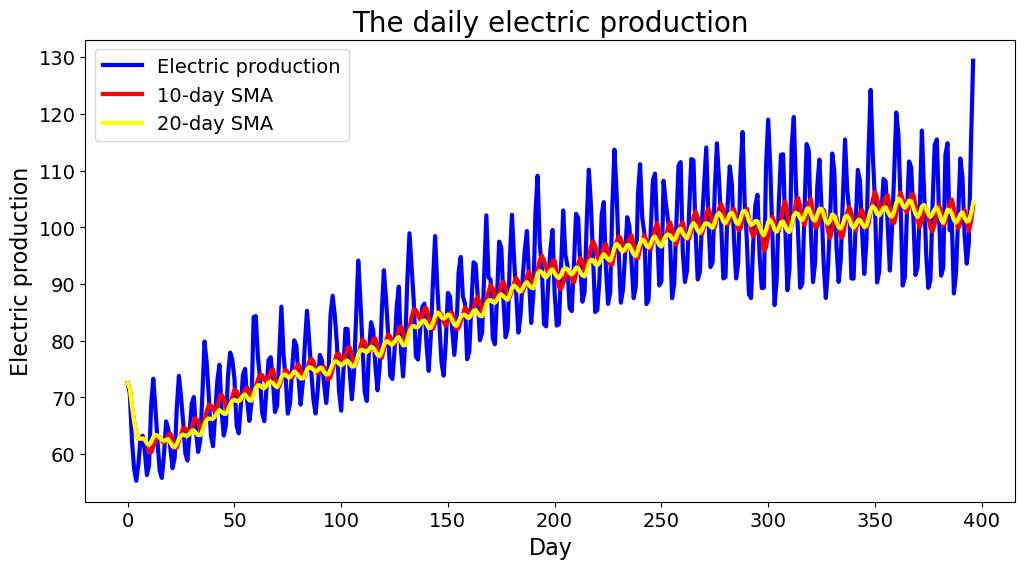

In [19]:
# SMA over 10 day and 20 day periods 
electric['SMA_10'] = electric.IPG2211A2N.rolling(10, min_periods=1).mean()
electric['SMA_20'] = electric.IPG2211A2N.rolling(20, min_periods=1).mean()
# blue = Electric Production, RED = 10 days, yellow: colors for the line plot
colors = ['blue', 'red', 'yellow']
# Line plot 
electric.plot(color=colors, linewidth=3, figsize=(12,6))
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.legend(labels =['Electric production', '10-day SMA', '20-day SMA'], fontsize=14)
plt.title('The daily electric production', fontsize=20)
plt.xlabel('Day', fontsize=16)
plt.ylabel('Electric production', fontsize=16)

## Cumulative Moving Average (CMA)
We take the unweighted mean of past values.

Text(0, 0.5, 'Electric production')

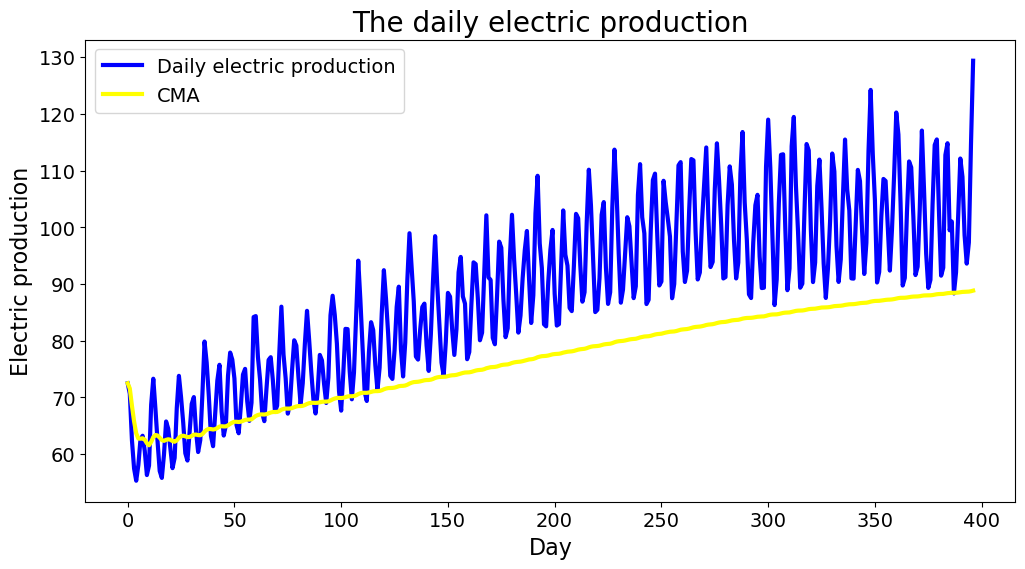

In [20]:
# CMA 
electric['CMA'] = electric.IPG2211A2N.expanding().mean()
# blue -Daily electric production and yellow -CMA
colors = ['blue', 'yellow']
# line plot
electric[['IPG2211A2N', 'CMA']].plot(color=colors, linewidth=3, figsize=(12,6))
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.legend(labels =['Daily electric production', 'CMA'], fontsize=14)
plt.title('The daily electric production', fontsize=20)
plt.xlabel('Day', fontsize=16)
plt.ylabel('Electric production', fontsize=16)

## Exponential Moving Average (EMA)
This method gives weight to recent observations, EMA is faster to change and more sensitive. $$ \alpha \in (0,1) $$ is the smoothing factor.

Text(0, 0.5, 'Electric production')

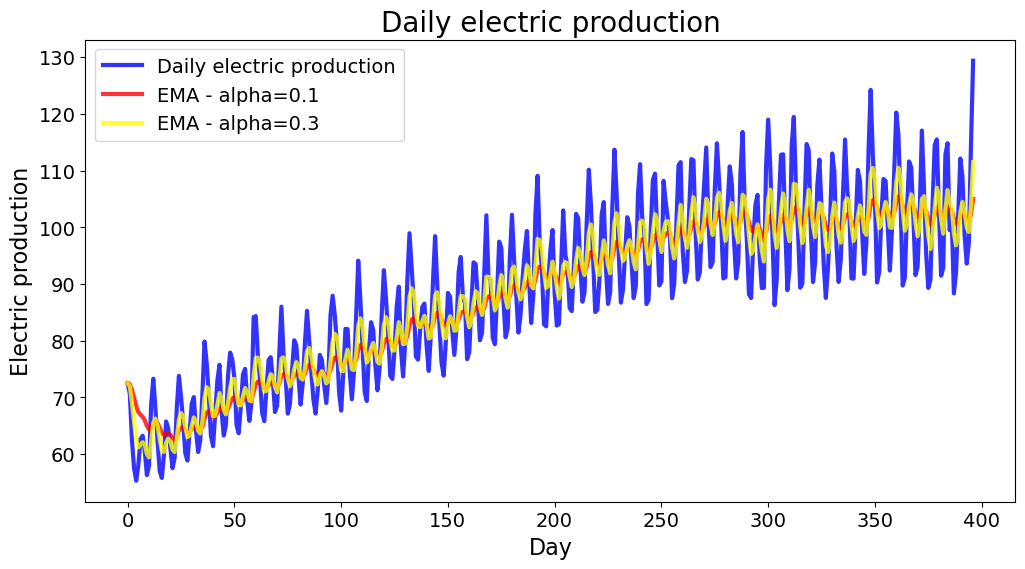

In [21]:
# EMA Electric Production
# Let's smoothing factor - 0.1
electric['EMA_0.1'] = electric.IPG2211A2N.ewm(alpha=0.1, adjust=False).mean()
# Let's smoothing factor  - 0.3
electric['EMA_0.3'] = electric.IPG2211A2N.ewm(alpha=0.3, adjust=False).mean()
# blue - Daily electric production, red- smoothing factor - 0.1, yellow - smoothing factor  - 0.3
colors = ['blue', 'red', 'yellow']
electric[['IPG2211A2N', 'EMA_0.1', 'EMA_0.3']].plot(color=colors, linewidth=3, figsize=(12,6), alpha=0.8)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.legend(labels=['Daily electric production', 'EMA - alpha=0.1', 'EMA - alpha=0.3'], fontsize=14)
plt.title('Daily electric production', fontsize=20)
plt.xlabel('Day', fontsize=16)
plt.ylabel('Electric production', fontsize=16)


# ARMA

ARMA, an acronym for Autoregressive Moving Average, is a model designed to comprehend and forecast a time series. The "AR" segment involves the regression of the variable $$ X_t $$ on its own past values. The "MA" portion models the error term as a linear combination of various time-indexed error terms. The model comprises a stochastic process defined by two polynomials, with 'p' representing the order of the autoregressive (AR) process and 'q' indicating the order of the moving average (MA) process.

The combined model ARMA(p,q) will have p autoregressive terms and q moving average terms.

$$ X_t = \epsilon_t + \sum_{i=1}^p \phi_i X_{t-i} + \sum_{i=1}^q \theta_i \epsilon_{t-1} $$

The ARMA model incorporates both past trends and unexpected occurrences. The Autoregressive (AR) component considers past data, while the Moving Average (MA) component accounts for sudden, unpredictable events. However, the ARMA model doesn't handle volatility clustering, which is a situation where variance fluctuates over time, a condition also known as heteroskedasticity.

# ARIMA